# 서울지역 스타벅스 매장정보 크롤링 
>- 과제1 : 메인화면 페이지 화면캡쳐 및 저장
- 과제2 : 서울지역 스타벅스 매장정보 크롤링
- 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha *100 / 스타벅스매장수 / 인구수)
- 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화
- 과제5 : 스벅비율이 반영된 파일을 저장

## 과제1 : 메인화면 페이지 화면캡쳐 및 저장

In [1]:
# ! pip install selenium

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
import pandas as pd

import re

In [3]:
# driver 사용해 Chrome 창 열기

driver_path = 'driver/chromedriver.exe'
driver = webdriver.Chrome(executable_path=driver_path)

In [4]:
# 스타벅스 페이지 열기 

url_page = 'http://www.istarbucks.co.kr/store'
driver.get(url_page)

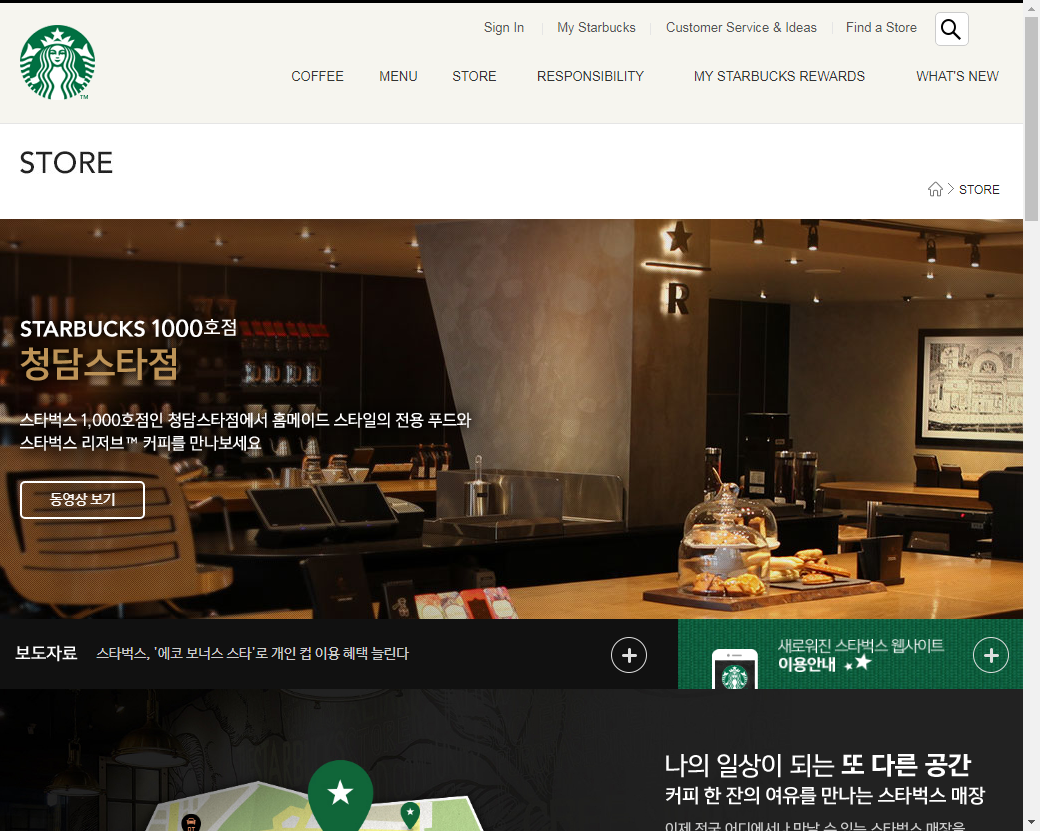

In [5]:
# 화면 캡처하기

capture_img = './images/starbucks_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

## 과제2 : 서울지역 스타벅스 매장정보 크롤링

In [6]:
# 클릭 시작

driver.find_element_by_xpath('//*[@id="container"]/section[1]/article/div[2]/a').click()

In [8]:
# driver.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()
# //*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a

In [9]:
driver.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()


In [10]:
driver.find_element_by_xpath('//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [11]:
# 클릭 끝, html 정보 끌어오기

html2 = 'http://www.istarbucks.co.kr/store/store_map.do'
soup2 = BeautifulSoup(html2, 'lxml')
soup2.title

C:\Python\Anaconda3-52\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.istarbucks.co.kr/store/store_map.do" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [12]:
# page_source 가져오기.

html = driver.page_source
# html
soup = BeautifulSoup(html, 'lxml')
soup.title

<title id="titleJoin">Starbucks Coffee Korea</title>

In [13]:
# tag 사용해 분류하기

tmp = soup.find('ul', 'quickSearchResultBoxSidoGugun')
tmp
# len(tmp)

<ul class="quickSearchResultBoxSidoGugun"><li class="quickResultLstCon" data-code="3623" data-hlytag="null" data-index="0" data-lat="37.5273669" data-long="127.033061" data-name="압구정R" data-storecd="1411" style="background:#fff"> <strong>압구정R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="압구정R" data-store="1411" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br/><a href="tel:02-541-3622">02-541-3622</a></p> <i class="pin_reserve">리저브 매장 2번</i></li><li class="quickResultLstCon" data-code="3588" data-hlytag="null" data-index="1" data-lat="37.488008" data-long="127.102650" data-name="수서역R" data-storecd="1389" style="background:#fff"> <strong>수서역R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="수서역R" data-store="1389" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p

In [14]:
# tag 사용해 분류하기2

tmp2 = tmp.find_all('strong')
tmp2
# len(tmp2)
#tmp.split()

[<strong>압구정R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="압구정R" data-store="1411" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>수서역R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="수서역R" data-store="1389" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>양재강남빌딩R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="양재강남빌딩R" data-store="1404" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>선릉동신빌딩R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="선릉동신빌딩R" data-store="1355" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong>,
 <strong>봉은사로선정릉  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N"

In [15]:
tmp2[0].get_text()

'압구정R  '

### 매점 이름 뽑기

In [16]:
name = []

phone = []

for i in range(len(tmp2)):
    name.append(tmp2[i].get_text())
    name[i] = name[i].replace(' ', "")
    
name

['압구정R',
 '수서역R',
 '양재강남빌딩R',
 '선릉동신빌딩R',
 '봉은사로선정릉',
 '강남오거리',
 '스타필드코엑스몰R',
 '강남구청정문',
 '도곡공원',
 '강남R',
 '대치은마사거리',
 '청담영동대로',
 '압구정',
 '신사가로수',
 '청담스타R',
 '강남우성',
 '학동사거리',
 '대치사거리',
 '포스코사거리',
 '을지병원사거리',
 '신사역',
 '도곡역',
 '서울세관사거리',
 '청담사거리',
 '한티역',
 '역삼초교사거리',
 '코엑스몰',
 '가로수길',
 '역삼대로',
 '역삼포스코',
 '강남대로',
 '청담',
 '삼성도심공항',
 '삼성교',
 '학동역',
 '대치',
 '기술센터',
 '신세계도곡',
 '삼성',
 '선릉세화빌딩',
 '압구정역',
 '압구정로',
 '구역삼사거리',
 '큰길타워',
 '강남구청역',
 '대치역',
 '포이',
 '아크플레이스',
 '학여울역',
 '선정릉역',
 '삼성현대힐',
 'GS타워',
 '압구정미소',
 '선릉역',
 '수서',
 '코엑스사거리',
 '역삼럭키',
 '차병원사거리',
 '청담공원',
 '신압구정',
 '아크로힐스논현',
 '뱅뱅사거리',
 '강남비젼타워',
 '역삼역',
 '압구정로데오역',
 '르네상스사거리',
 '포스코',
 '선릉로',
 '삼성역',
 '논현힐탑',
 '도산가로수길',
 '미아뉴타운',
 '강북구청사거리',
 '미아사거리역',
 '수유역',
 '미아역',
 '우장산역',
 '마곡사이언스타워R',
 '방화DT',
 '마곡나루역',
 '마곡GMG',
 '가양역',
 '화곡DT',
 '양천향교역',
 '화곡동',
 '등촌',
 '염창역',
 '발산역',
 '가양이마트',
 '까치산역',
 '신림DT',
 '서울대역',
 '낙성대DT',
 '사당',
 '보라매대교',
 '신림사거리',
 '신림',
 '신림역포도몰',
 '서울대입구역',
 '아차산역',
 '올림픽대교북단',
 '구의DT',
 '자양사거리',
 '군자역',
 '광나루

### 주소와 번호 뽑기

In [17]:
tmp3 = tmp.find_all('p', 'result_details')
tmp3
tmp3[0]
# type(tmp3)
# test =tmp3[0].get_text()
# test

<p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br/><a href="tel:02-541-3622">02-541-3622</a></p>

In [18]:
# phone_num = re.search('\d+[-]\d+[-]\d+', test).group()
# phone_num
# # type(phone_num)

NameError: name 'test' is not defined

In [19]:
a = tmp3[0].get_text()
a1= re.search('\d+[-]\d+[-]\d+', a).group()
a2 =a[:-len(a1)]
print(a2)

서울특별시 강남구 언주로 861 (신사동)


### 주소와 번호 분리

In [20]:
address = []
phone = []

for i in range(len(tmp3)):
    moon = tmp3[i].get_text()
    moon2 = re.search('\d+[-]\d+[-]\d+', moon).group()
    phone.append(moon2)
    address.append(moon.replace('\d+[-]\d+[-]\d+', ''))
    
    
phone


['02-541-3622',
 '02-6181-3688',
 '02-571-3604',
 '02-2051-3562',
 '02-539-3564',
 '02-557-3484',
 '02-6002-3467',
 '02-514-3397',
 '02-565-3496',
 '02-561-3478',
 '02-554-3315',
 '02-3443-3371',
 '02-541-3306',
 '02-3446-3356',
 '02-514-3364',
 '02-565-3347',
 '02-758-8971',
 '02-561-3287',
 '02-554-3235',
 '02-758-8896',
 '02-758-8848',
 '02-758-8809',
 '02-758-8798',
 '02-758-8726',
 '02-758-8683',
 '02-758-8739',
 '02-758-8733',
 '02-758-8661',
 '02-758-8626',
 '02-758-8631',
 '02-758-8624',
 '02-758-8659',
 '02-758-8635',
 '02-758-8592',
 '02-758-8101',
 '02-758-8063',
 '02-6009-3410',
 '02-2191-1260',
 '02-758-8038',
 '02-758-8028',
 '02-758-8013',
 '02-758-8231',
 '02-758-8247',
 '02-758-8116',
 '02-758-8119',
 '02-758-8120',
 '02-758-8122',
 '02-758-8158',
 '02-758-8151',
 '02-758-8970',
 '02-758-8278',
 '02-758-8129',
 '02-758-8109',
 '02-758-8108',
 '02-758-8165',
 '02-758-8478',
 '02-758-8463',
 '02-758-8444',
 '02-758-8394',
 '02-758-8398',
 '02-758-8317',
 '02-758-8325',
 

In [21]:
address = []
phone = []
gu = []

for i in range(len(tmp3)):
    moon = tmp3[i].get_text()
    moon2 = re.search('\d+[-]\d+[-]\d+', moon).group()
    phone.append(moon2)
    moon3 = moon[:-len(moon2)]
    address.append(moon3)
    gu.append(moon3.split(' ')[1])

gu
# address

['강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '노원구',
 '노원구',
 '노원구',


### 데이터 프레임 만들기

In [22]:
starbucks = pd.DataFrame({'스타벅스매장': name, '구': gu, '주소':address, '전화번호':phone})
starbucks

,스타벅스매장,구,주소,전화번호
0,압구정R,강남구,서울특별시 강남구 언주로 861 (신사동),02-541-3622
1,수서역R,강남구,서울특별시 강남구 광평로 281 (수서동),02-6181-3688
2,양재강남빌딩R,강남구,서울특별시 강남구 남부순환로 2621 (도곡동),02-571-3604
3,선릉동신빌딩R,강남구,서울특별시 강남구 테헤란로 409 (삼성동),02-2051-3562
4,봉은사로선정릉,강남구,서울특별시 강남구 봉은사로 446 (삼성동),02-539-3564
5,강남오거리,강남구,서울특별시 강남구 봉은사로2길 39 (역삼동),02-557-3484
6,스타필드코엑스몰R,강남구,서울특별시 강남구 영동대로 513 (삼성동),02-6002-3467
7,강남구청정문,강남구,서울특별시 강남구 학동로 419 (청담동),02-514-3397
8,도곡공원,강남구,서울특별시 강남구 도곡로 205 (역삼동),02-565-3496
9,강남R,강남구,서울특별시 강남구 강남대로 390 (역삼동),02-561-3478


## 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha *100 / 스타벅스매장수 / 인구수)

In [23]:
population = pd.read_csv('data/seoul_population_cctv.csv', sep=',', encoding='euc-kr')
population

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750
5,송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414
6,도봉구,825,246.638655,137901,342990,340876,2114,55499,0.616344,16.180938,0.240532,625.687072
7,중랑구,916,79.960707,180044,409058,404313,4745,61271,1.159982,14.978560,0.223929,606.160018
8,광진구,878,53.228621,161714,369999,355032,14967,45202,4.045146,12.216790,0.237298,601.905647
9,강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102


In [24]:
population2 = population[['구', '세대수', '인구수', '고령자', '고령자비율']]

In [30]:
population2['세대당인구'] = population['인구수']/population['세대수']
population2
type(population2)

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


pandas.core.frame.DataFrame

In [38]:
you = pd.DataFrame(starbucks['구'].value_counts())
you

,구
강남구,71
중구,48
서초구,45
종로구,38
영등포구,33
마포구,32
송파구,27
서대문구,20
용산구,17
강서구,14


In [39]:
you2 = pd.DataFrame({'구': you.index, '스타벅스':you['구']})
you2
# pd.concat(population2, you, keys='구')

,구,스타벅스
강남구,강남구,71
중구,중구,48
서초구,서초구,45
종로구,종로구,38
영등포구,영등포구,33
마포구,마포구,32
송파구,송파구,27
서대문구,서대문구,20
용산구,용산구,17
강서구,강서구,14


### 데이터프레임 합치기

In [48]:
# pd.concat([population2, you2], axis=1, ignore_index=False, join='outer')
population3 = pd.merge(population2, you2, on='구')
population3

,구,세대수,인구수,고령자,고령자비율,세대당인구,스타벅스
0,강남구,228883,549255,66412,12.091287,2.399720,71
1,양천구,176598,469945,57442,12.223132,2.661100,14
2,강서구,257558,605068,78814,13.025643,2.349249,14
3,용산구,108777,245087,37443,15.277432,2.253114,17
4,서초구,173912,441539,54887,12.430838,2.538864,45
5,송파구,269558,673582,80220,11.909463,2.498839,27
6,도봉구,137901,342990,55499,16.180938,2.487219,1
7,중랑구,180044,409058,61271,14.978560,2.271989,6
8,광진구,161714,369999,45202,12.216790,2.287984,13
9,강북구,143172,324276,57741,17.806128,2.264940,5


### 스벅비율 구하기

In [54]:
population3['스벅비율'] = 1000000 * population3['스타벅스']/population3['인구수']

### 데이터 정렬하기

In [56]:
population3.sort_values(by='스타벅스', ascending=False)

,구,세대수,인구수,고령자,고령자비율,세대당인구,스타벅스,스벅비율
0,강남구,228883,549255,66412,12.091287,2.399720,71,129.266006
19,중구,61232,135258,21902,16.192758,2.208943,48,354.877346
4,서초구,173912,441539,54887,12.430838,2.538864,45,101.916252
15,종로구,73696,163086,26622,16.323903,2.212956,38,233.005899
17,영등포구,170208,403724,55364,13.713329,2.371945,33,81.739010
11,마포구,171320,385032,50559,13.131116,2.247443,32,83.109975
5,송파구,269558,673582,80220,11.909463,2.498839,27,40.084207
20,서대문구,138027,322497,50278,15.590223,2.336478,20,62.016081
3,용산구,108777,245087,37443,15.277432,2.253114,17,69.363124
2,강서구,257558,605068,78814,13.025643,2.349249,14,23.137895


### 인덱스 교체하기

In [58]:
population3.set_index('구', inplace=True)
population3

,세대수,인구수,고령자,고령자비율,세대당인구,스타벅스,스벅비율
구,,,,,,,
강남구,228883,549255,66412,12.091287,2.399720,71,129.266006
양천구,176598,469945,57442,12.223132,2.661100,14,29.790720
강서구,257558,605068,78814,13.025643,2.349249,14,23.137895
용산구,108777,245087,37443,15.277432,2.253114,17,69.363124
서초구,173912,441539,54887,12.430838,2.538864,45,101.916252
송파구,269558,673582,80220,11.909463,2.498839,27,40.084207
도봉구,137901,342990,55499,16.180938,2.487219,1,2.915537
중랑구,180044,409058,61271,14.978560,2.271989,6,14.667847
광진구,161714,369999,45202,12.216790,2.287984,13,35.135230


## 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화

In [61]:
import json   # json 파일을 불러오기 위한 패키지
import folium


In [62]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='UTF-8'))

In [64]:
map = folium.Map(location = [37.5502, 126.982], zoom_start =11, tiles = 'Stamen Toner')
map

### 스벅 매장 수 시각화

In [67]:
map = folium.Map(location = [37.5502, 126.982], zoom_start =11, tiles = 'Stamen Toner')


map.choropleth(geo_data=geo_str, data=population3, columns=[population3.index, '스타벅스'], fill_color = 'PuRd', key_on='feature.id')

map

### 스벅비율 시각화

In [70]:
map = folium.Map(location = [37.5502, 126.982], zoom_start =11, tiles = 'Stamen Toner')

map.choropleth(geo_data=geo_str, data=population3, columns=[population3.index, '스벅비율'], fill_color = 'YlGnBu', key_on='feature.id')

map

## 과제5 : 스벅비율이 반영된 파일을 저장

In [71]:
population3.to_csv('data/seoul_population_starbucks.csv', sep=',', encoding='euc-kr')

In [72]:
% ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3EFF-82E2

 C:\Users\student\Anaconda_src\data 디렉터리

2018-11-08  오후 04:44    <DIR>          .
2018-11-08  오후 04:44    <DIR>          ..
2018-10-29  오후 04:32    <DIR>          .ipynb_checkpoints
2018-11-07  오후 02:16             7,675 chicagomag_info.csv
2018-11-07  오후 03:45            10,404 chicagomag_info_ver2.csv
2018-10-29  오후 04:54               310 company.csv
2018-11-01  오후 04:26                62 girlgroup.json
2018-10-29  오후 04:33                27 hello.txt
2018-11-01  오후 04:29               162 member.json
2018-11-08  오전 09:12             4,201 movie_rank.csv
2018-11-07  오후 07:50             2,007 musicrank_top100.csv
2018-11-06  오후 03:20             1,140 opengov_2018_seoul_cctv_status_by_year.csv
2018-11-01  오후 04:31               193 person.json
2018-11-05  오후 04:59               556 police_cctv.csv
2018-11-06  오후 03:20            12,817 public_2016_crime_st.csv
2018-11-06  오후 03:20               523 public_2017_seoul_cctv_st.csv
2018-11-